<a href="https://colab.research.google.com/github/huseyincevik46/image_processing/blob/main/12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


GEREKLİ KÜTÜPHANE YÜKLEMELERİ

In [ ]:
!pip install opencv-python-headless scikit-image


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


NORMALİZE VE GÜRÜLTÜ GİDERME İŞLEMLERİ

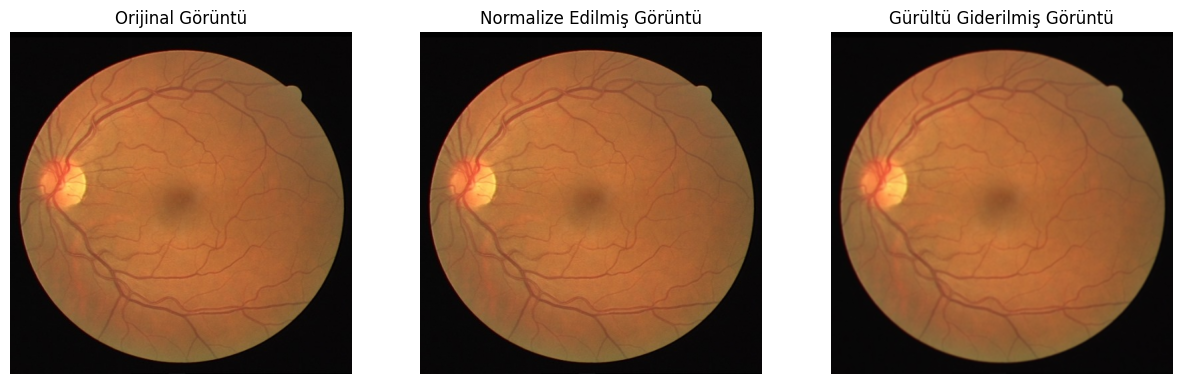

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görseli yükleme
image_path = "/content/drive/MyDrive/image.png"
image = cv2.imread(image_path)

# Görseli RGB formatına dönüştürme
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Normalizasyon (0-1 aralığına)
image_normalized = image_rgb / 255.0

# Gürültü giderme - Gaussian Blur
image_denoised = cv2.GaussianBlur(image_normalized, (5, 5), 0)

# Görseli normalize edilmiş ve gürültüsü giderilmiş şekilde görselleştirme
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Orijinal Görüntü")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image_normalized)
plt.title("Normalize Edilmiş Görüntü")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image_denoised)
plt.title("Gürültü Giderilmiş Görüntü")
plt.axis("off")

plt.show()


HİSTOGRAM VE GÖRÜNTÜ KESKİNLEŞTİRME

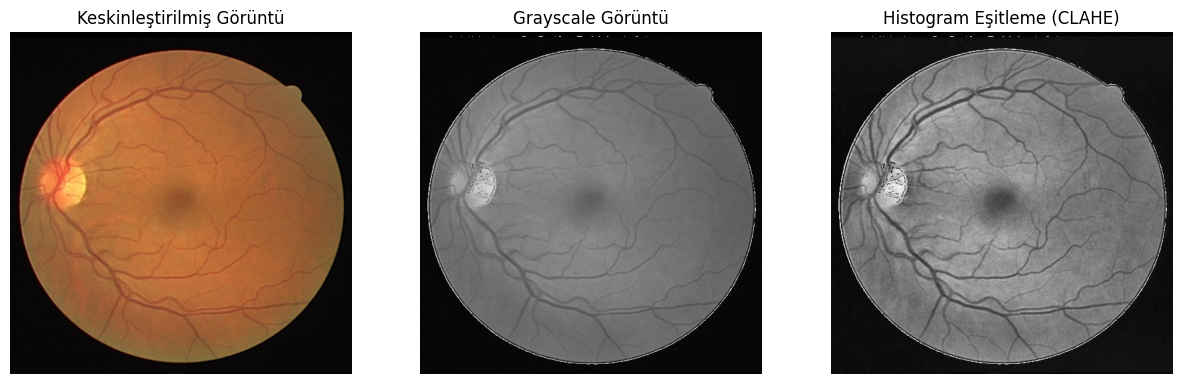

In [ ]:
# Keskinleştirme filtresi uygulama (Unsharp Masking)
sharp_kernel = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])
image_sharpened = cv2.filter2D(image_denoised, -1, sharp_kernel)

# Histogram eşitleme: Görüntüyü grayscale'e çevirip CLAHE uygulama (Adaptive Histogram Equalization)
image_gray = cv2.cvtColor((image_sharpened * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_hist_equalized = clahe.apply(image_gray)

# Keskinleştirilmiş ve histogram eşitlenmiş görüntüleri görselleştirme
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_sharpened)
plt.title("Keskinleştirilmiş Görüntü")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Görüntü")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image_hist_equalized, cmap='gray')
plt.title("Histogram Eşitleme (CLAHE)")
plt.axis("off")

plt.show()


DOKU MODELLEME

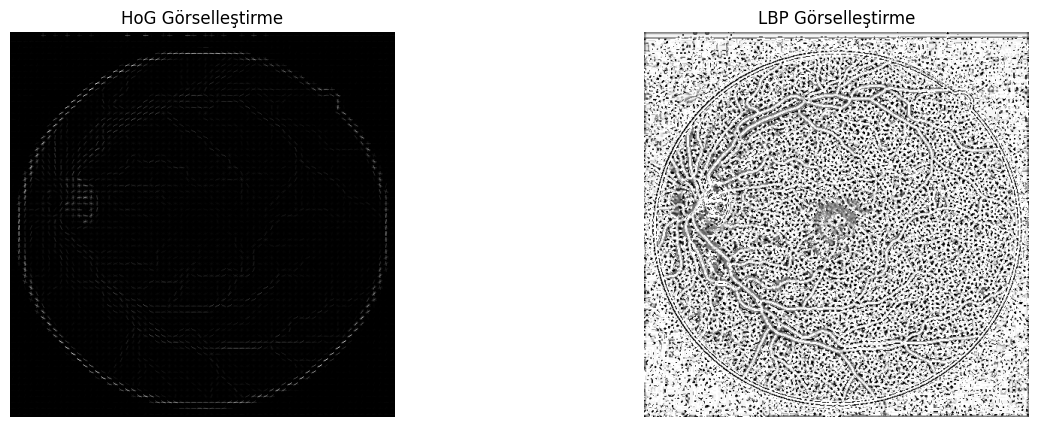

In [ ]:
from skimage.feature import hog, local_binary_pattern
import matplotlib.pyplot as plt

# HoG (Histogram of Oriented Gradients) özellik çıkarımı
# Parametreler: Pikseller arasındaki hücre boyutları ve blok normalizasyonu
hog_features, hog_image = hog(image_hist_equalized,
                              pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2),
                              visualize=True,
                              channel_axis=None)

# LBP (Local Binary Pattern) özellik çıkarımı
radius = 3  # Komşuluk yarıçapı
n_points = 8 * radius  # Çevredeki piksel sayısı
lbp_image = local_binary_pattern(image_hist_equalized, n_points, radius, method="uniform")

# HoG ve LBP görselleştirme
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(hog_image, cmap="gray")
plt.title("HoG Görselleştirme")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap="gray")
plt.title("LBP Görselleştirme")
plt.axis("off")

plt.show()


DOKU MODELLEMELER BAŞARILI OLMADI

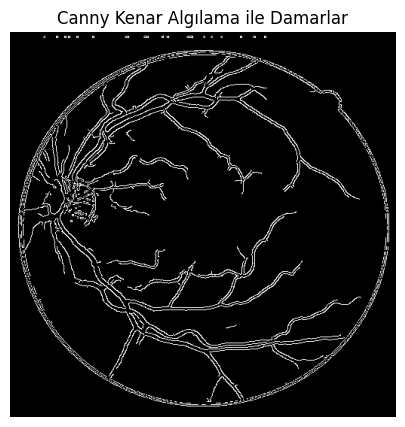

In [ ]:
# Canny kenar algılama
edges = cv2.Canny(image_hist_equalized, 100, 200)

# Kenarları görselleştirme
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(edges, cmap='gray')
plt.title("Canny Kenar Algılama ile Damarlar")
plt.axis("off")
plt.show()


HARRİs KÖŞE ALGILAMA

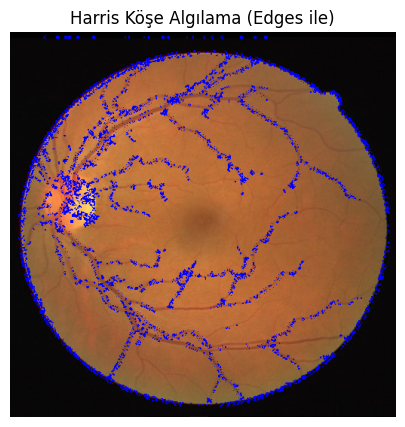

In [ ]:
# Harris köşe algılama - Kenar görüntüsünü kullanma
edges_float = np.float32(edges)
dst = cv2.cornerHarris(edges_float, 2, 3, 0.04)

# Harris köşe algılamayı görselleştirme
output_image_harris = image_rgb.copy()
output_image_harris[dst > 0.01 * dst.max()] = [0, 0, 255]  # Köşe noktalarını kırmızı ile işaretleme

# Görselleştirme
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(output_image_harris)
plt.title("Harris Köşe Algılama (Edges ile)")
plt.axis("off")
plt.show()


KÖŞE TESPİTİ VE KENARLARI BİRLEŞTİRME

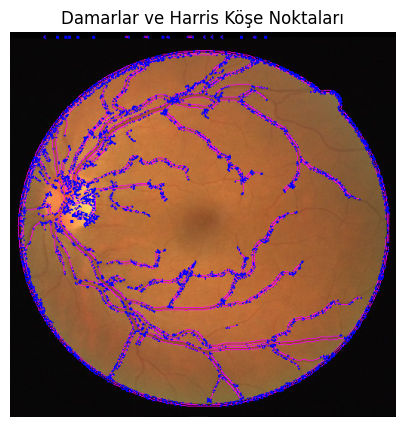

In [ ]:
# Damarlar ve Harris köşe tespit sonuçlarını birleştirelim

# Köşe tespiti (Harris) ve kenarları (Canny) birleştirelim
combined_image = np.copy(image_rgb)

# Canny kenarları mor ile, Harris köşe noktalarını kırmızı ile işaretleyelim
combined_image[edges > 0] = [255, 0, 255]  # Damarları mor ile
combined_image[dst > 0.01 * dst.max()] = [0, 0, 255]  # Harris köşe noktalarını kırmızı ile

# Sonuçları görselleştirelim
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(combined_image)
plt.title("Damarlar ve Harris Köşe Noktaları")
plt.axis("off")
plt.show()


KURULAN ALGORİTMA SONUC BİR GÖRSEL ÜZERİNDE SONUÇ

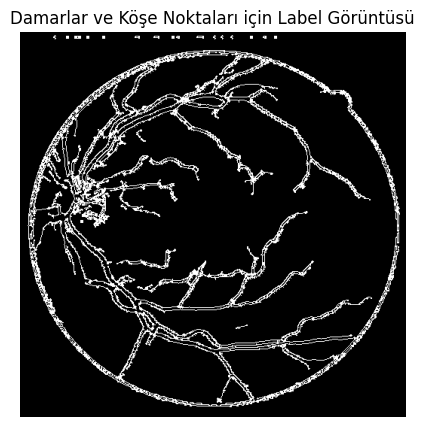

In [ ]:
# Etiketleme işlemi: Damarlar ve Harris köşe noktalarını siyah-beyaz etiket olarak oluşturma

# Boş bir label görüntüsü oluşturuyoruz (siyah arka plan)
label_image = np.zeros_like(edges, dtype=np.uint8)

# Damarlar (Canny kenarları) için beyaz renk
label_image[edges > 0] = 255

# Harris köşe noktaları için beyaz renk
label_image[dst > 0.01 * dst.max()] = 255

# Etiketleme görüntüsünü görselleştirelim
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(label_image, cmap='gray')
plt.title("Damarlar ve Köşe Noktaları için Label Görüntüsü")
plt.axis("off")
plt.show()


MODELLEME

Görüntü veya maske yüklenemedi: .ipynb_checkpoints, .ipynb_checkpoints
1.png ve 1.png başarıyla yüklendi!


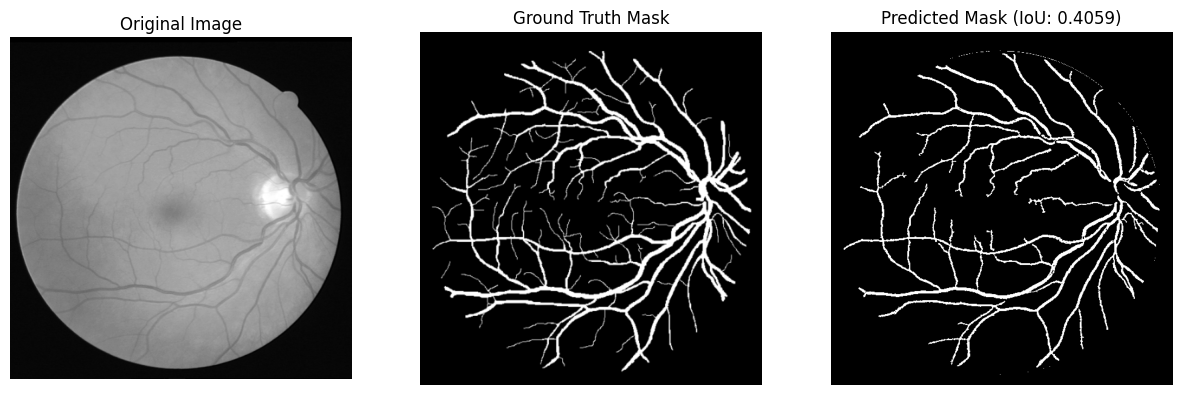

2.png ve 2.png başarıyla yüklendi!


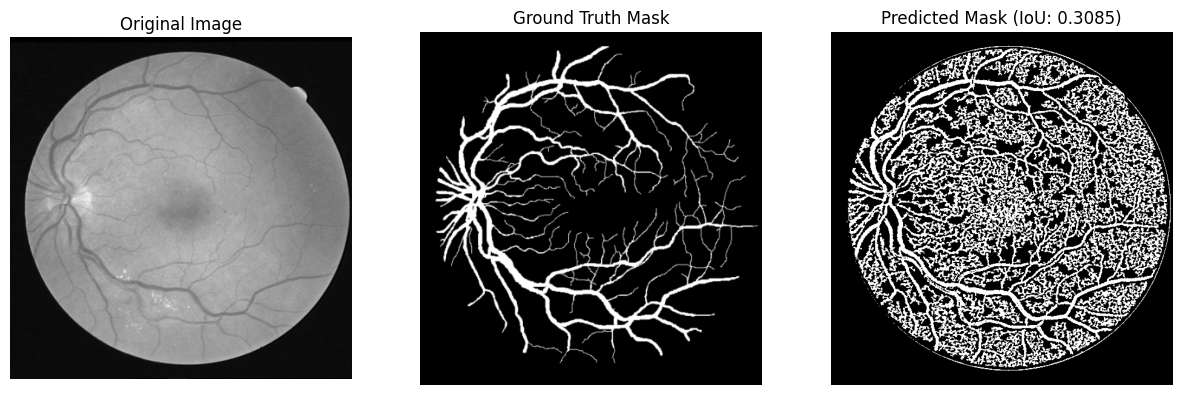

3.png ve 3.png başarıyla yüklendi!


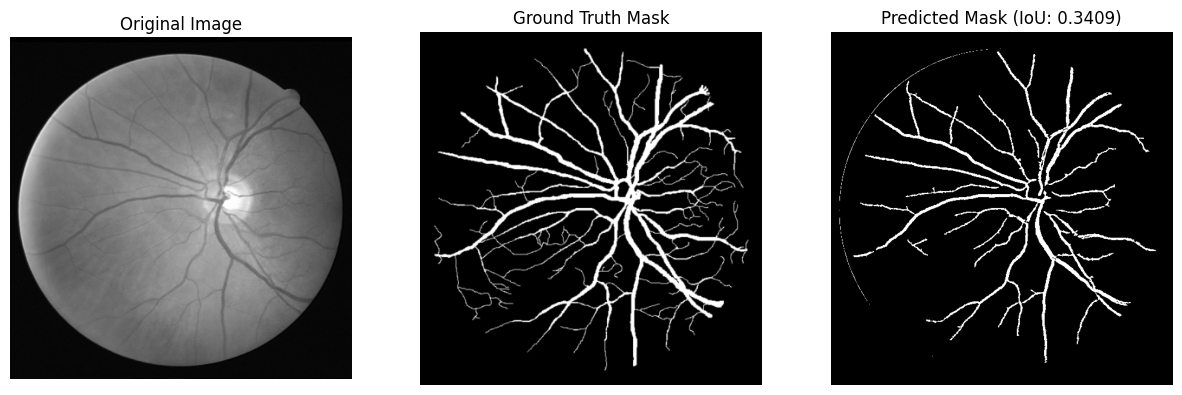

4.png ve 4.png başarıyla yüklendi!


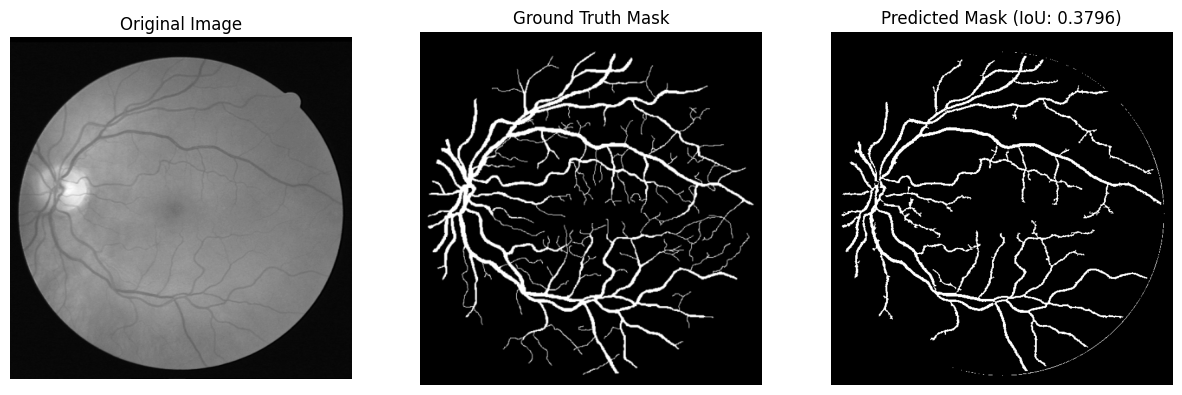

5.png ve 5.png başarıyla yüklendi!


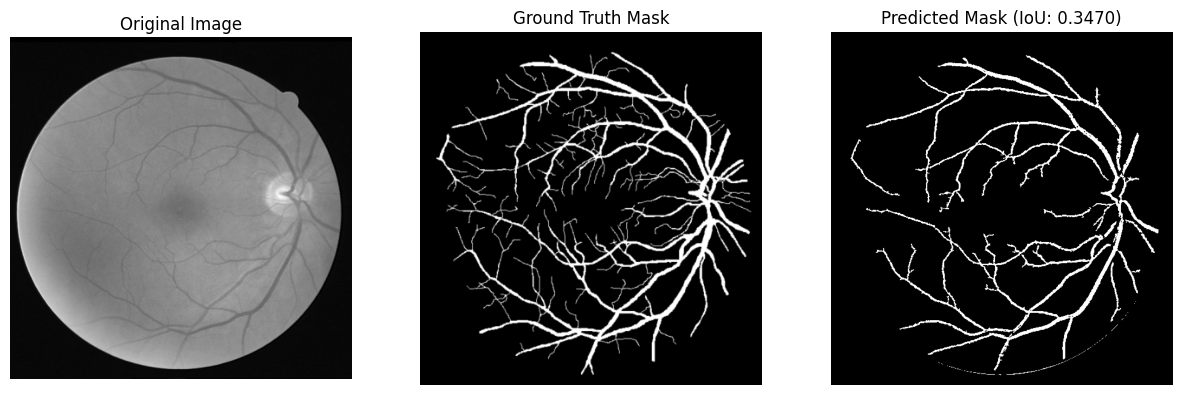

6.png ve 6.png başarıyla yüklendi!


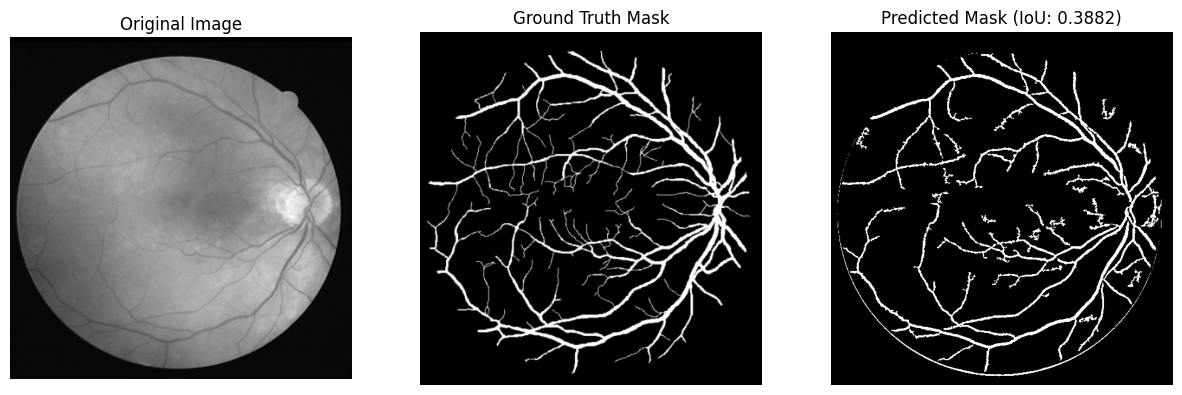

7.png ve 7.png başarıyla yüklendi!


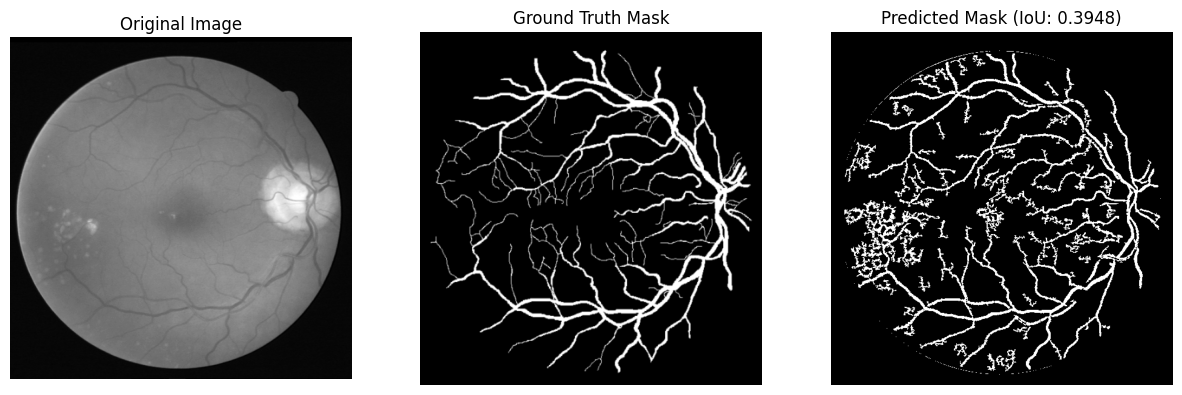

8.png ve 8.png başarıyla yüklendi!


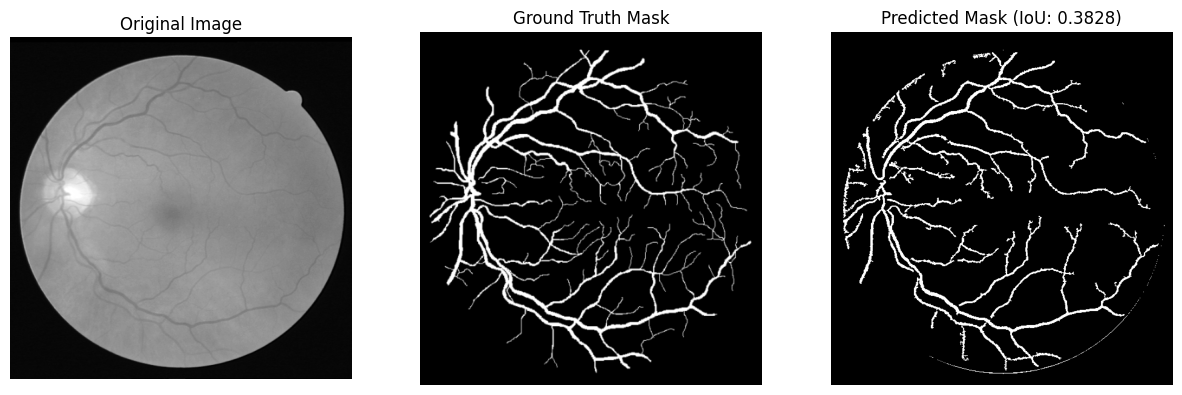

9.png ve 9.png başarıyla yüklendi!


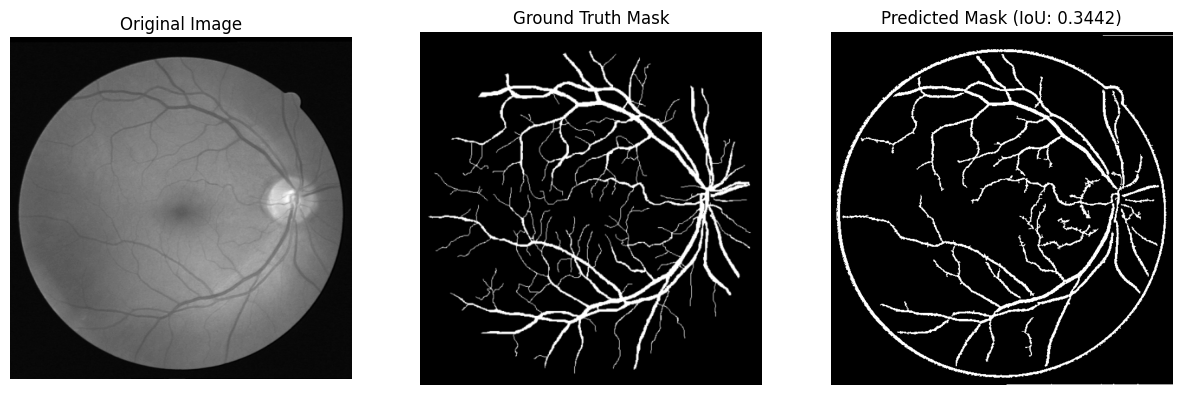

Average IoU for 9 images: 0.3658


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, color
from skimage.filters import threshold_otsu
from skimage import morphology

# IoU hesaplama fonksiyonu
def compute_iou(ground_truth, prediction):
    intersection = np.logical_and(ground_truth, prediction).sum()
    union = np.logical_or(ground_truth, prediction).sum()
    return intersection / union if union != 0 else 0

# Segmentasyon ve görüntü işleme fonksiyonu
def enhanced_process_image(image):
    if image is None or image.size == 0:
        raise ValueError("Giriş görüntüsü boş!")

    # Görüntüyü yeniden boyutlandır
    resized_image = cv2.resize(image, (565, 584))

    # 1. Keskinleştirme
    sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(resized_image, -1, sharpen_kernel)

    # 2. Histogram eşitleme
    equalized = cv2.equalizeHist(sharpened_image)

    # 3. Canny Kenar Algılama
    edges = cv2.Canny(equalized, 50, 200)

    # 4. Gaussian Blur (Gürültü giderme ve damarları netleştirme)
    blurred = cv2.GaussianBlur(edges, (5, 5), 0)

    # 5. Morfolojik işlemler (Kapama işlemi) kenarlarda iyileştirme
    kernel = np.ones((5, 5), np.uint8)
    morph_close = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)

    # 6. PCA ve Renk Doldurma
    if len(resized_image.shape) == 2:  # Eğer grayscale ise
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

    converted_image = resized_image / 255.0
    lab_image = color.rgb2lab(converted_image)
    fill = np.array([1, 0, 0])
    filled_image = lab_image * fill

    reshaped_lab_image = filled_image.reshape(-1, 3)
    mean = np.mean(reshaped_lab_image, axis=0)
    centered_data = reshaped_lab_image - mean
    cov_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    principal_component = centered_data @ eigenvectors[:, -1]
    s = principal_component.reshape(lab_image.shape[:2])
    gray_image = (s - np.min(s)) / (np.max(s) - np.min(s))

    # 7. Histogram eşitleme ve filtreleme
    enhanced_image = exposure.equalize_adapthist(gray_image, clip_limit=0.03, nbins=128)
    kernel = np.ones((9, 9), np.float32) / 81
    filtered_image = cv2.filter2D(enhanced_image, -1, kernel)

    # 8. Görüntü çıkarma
    subtracted_image = filtered_image - enhanced_image

    # 9. Otsu eşikleme
    threshold_level = threshold_otsu(subtracted_image)
    binary_image = subtracted_image > (threshold_level - 0.008)

    # 10. Küçük gürültüleri temizle
    clean_image = morphology.remove_small_objects(binary_image, min_size=100)

    # 11. Dairesel sınırları kaldırmak için Hough Daire Algoritması
    if len(resized_image.shape) == 3:  # Eğer RGB veya BGR ise
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    else:
        gray = resized_image

    # Gri tonlamalı görüntüyü kontrol et
    if gray is None or gray.size == 0:
        raise ValueError("HoughCircles için gri tonlamalı görüntü boş veya okunamıyor!")

    # Format kontrolü
    if gray.dtype != np.uint8:
        gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Gaussian Blur uygulama
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Hough Daire Algoritması
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT, dp=1.2, minDist=150, param1=200, param2=40, minRadius=90, maxRadius=300
    )

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        max_radius = 0
        max_circle = None

        # En büyük daireyi seç
        for (x, y, r) in circles:
            if r > max_radius:
                max_radius = r
                max_circle = (x, y, r)

        if max_circle:
            x, y, r = max_circle
            # Maskeyi düzenle: En büyük dairenin dışındaki pikselleri temizle
            circle_mask = np.zeros_like(clean_image, dtype=np.uint8)
            cv2.circle(circle_mask, (x, y), r, 1, thickness=-1)
            circle_mask = circle_mask.astype(bool)
            clean_image = np.logical_and(clean_image, circle_mask)

    return clean_image

# Test için dizin yolları
image_dir = "/content/drive/MyDrive/DB2/image/"
mask_dir = "/content/drive/MyDrive/DB2/mask/"

# Görüntü ve maske dosyalarını sıralama
image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))

# Görüntü ve maske eşleştirme ve işleme
if image_files and mask_files:
    iou_scores = []

    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if image is None or mask is None:
            print(f"Görüntü veya maske yüklenemedi: {img_file}, {mask_file}")
            continue

        print(f"{img_file} ve {mask_file} başarıyla yüklendi!")

        mask_resized = cv2.resize(mask, (565, 584))

        try:
            predicted_mask = enhanced_process_image(image)
        except ValueError as e:
            print(f"Hata: {e}")
            continue

        iou = compute_iou(mask_resized > 0, predicted_mask > 0)
        iou_scores.append(iou)

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(mask_resized, cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(predicted_mask, cmap='gray')
        plt.title(f'Predicted Mask (IoU: {iou:.4f})')
        plt.axis('off')
        plt.show()

    avg_iou = sum(iou_scores) / len(iou_scores) if iou_scores else 0
    print(f"Average IoU for {len(iou_scores)} images: {avg_iou:.4f}")
else:
    print("Görüntü veya maske dosyaları yüklenemedi.")
